Matplotlib Boxplot

In [1]:
# Importing Libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [2]:
# Only get data analyst jobs
df_DA_us = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'United States')].copy()

# Drop NaN values from the column for plotting
df_DA_us = df_DA_us.dropna(subset=['salary_year_avg'])

df_DA_us['salary_year_avg'].sample(10)

619004     87499.5
554542    108100.0
109808     90000.0
137301     90000.0
449159    115800.0
235823    150000.0
121656     75000.0
138632    119200.0
99730     186093.0
683533     90000.0
Name: salary_year_avg, dtype: float64

<Axes: >

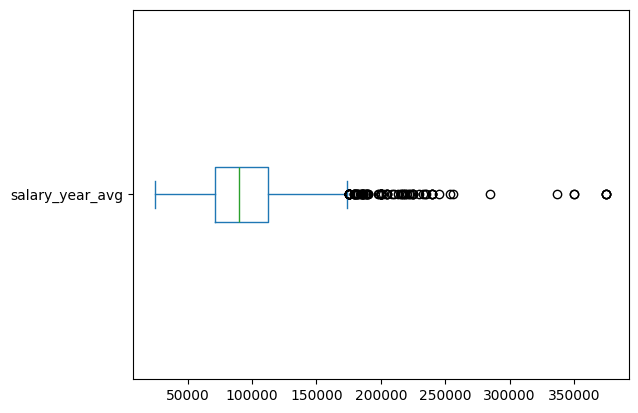

In [5]:
df_DA_us['salary_year_avg'].plot(kind='box', vert=False)

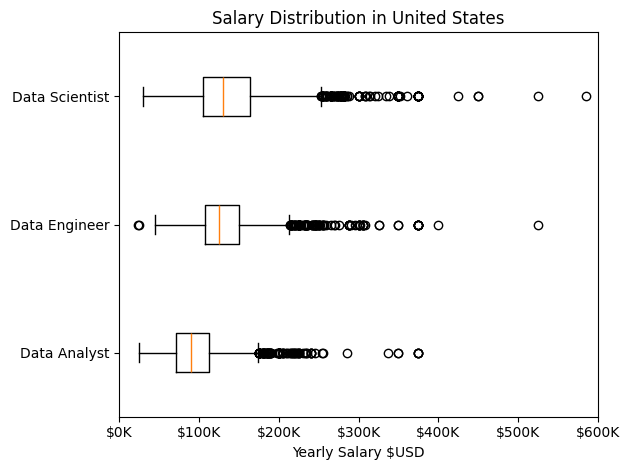

In [26]:
job_titles = ['Data Analyst', 'Data Engineer', 'Data Scientist']

# Filter the data to appropriate job_titles
df_us = df[(df['job_title_short'].isin(job_titles)) & (df['job_country'] == 'United States')].copy()
df_us = df_us.dropna(subset=['salary_year_avg'])

job_list = [df_us[df_us['job_title_short'] == job_title]['salary_year_avg'] for job_title in job_titles]

# Plot Boxplot
plt.boxplot(job_list, tick_labels=job_titles, vert=False)
plt.title('Salary Distribution in United States')
plt.xlabel('Yearly Salary $USD')
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f"${int(x/1000)}K"))
plt.xlim(0, 600000)
plt.tight_layout()
plt.show()